In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import find_peaks

pd.plotting.register_matplotlib_converters()
%matplotlib inline

plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn')

In [22]:
data = pd.read_csv('dataset.csv')
imax = data.Imax.values
imin = data.Imin.values

In [23]:
P = [(imax[i] - imin[i]) / (imax[i] + imin[i]) for i in range(len(imax))]
P = [x.__round__(4) for x in P]
data["Polarisation"] = P

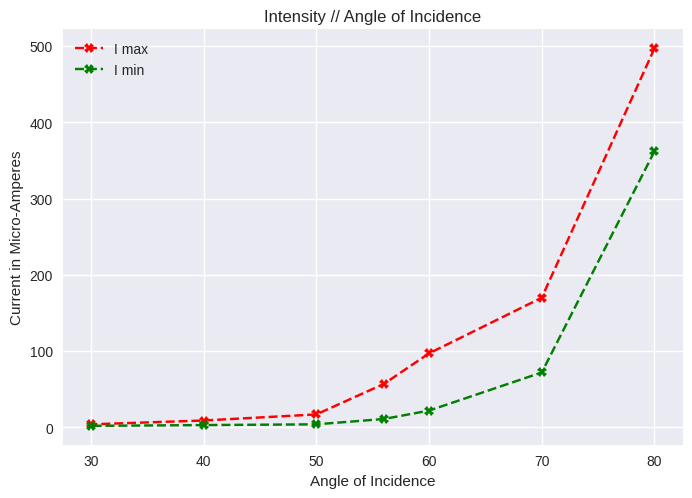

In [24]:
#Plotting
plt.plot(data.Angle[0:7],imax[0:7],'rX--')
plt.plot(data.Angle[0:7],imin[0:7],'gX--')
plt.legend(['I max','I min'])
plt.xlabel('Angle of Incidence')
plt.ylabel('Current in Micro-Amperes')
plt.title("Intensity // Angle of Incidence")
plt.savefig("Figure_1",dpi = 300)

In [25]:
data

,Angle,Imax,Imin,Polarisation
0,80,497,362,0.1572
1,70,170,72,0.4050
2,60,97,22,0.6303
3,56,57,11,0.6765
4,50,17,4,0.6190
5,40,9,3,0.5000
6,30,4,2,0.3333


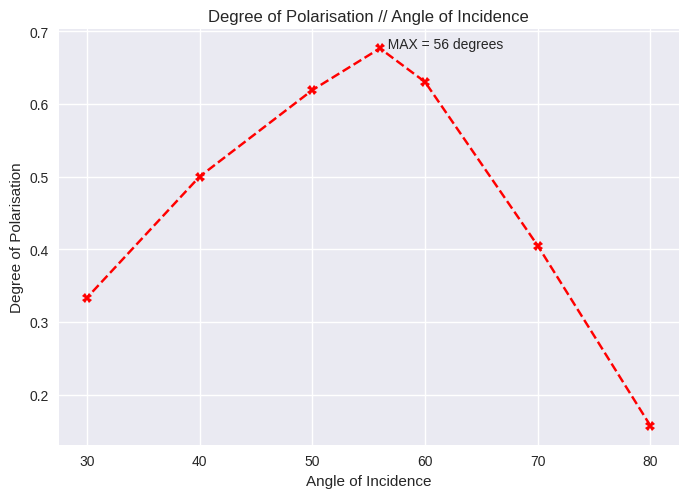

In [26]:
plt.plot(data.Angle, data.Polarisation,'rX--');
plt.xlabel('Angle of Incidence')
plt.ylabel('Degree of Polarisation');
x,y = data.Angle[list(data.Polarisation).index(max(data.Polarisation.values))], max(data.Polarisation)
plt.annotate("  MAX = 56 degrees",(x,y))
plt.title("Degree of Polarisation // Angle of Incidence")

plt.savefig('Figure_2',dpi = 300)

In [27]:
data2 = pd.read_csv('dataset_2.csv')
data2["P"] = [(i / max(data2.Current)).__round__(4) for i in data2.Current]

In [28]:
data2["cos^2 θ"] = [((np.cos(x * np.pi/180))**2).__round__(3) for x in data2.RelativeAngle]
m, c = np.polyfit(data2.RelativeAngle,data2.P,1)
data2.index += 1

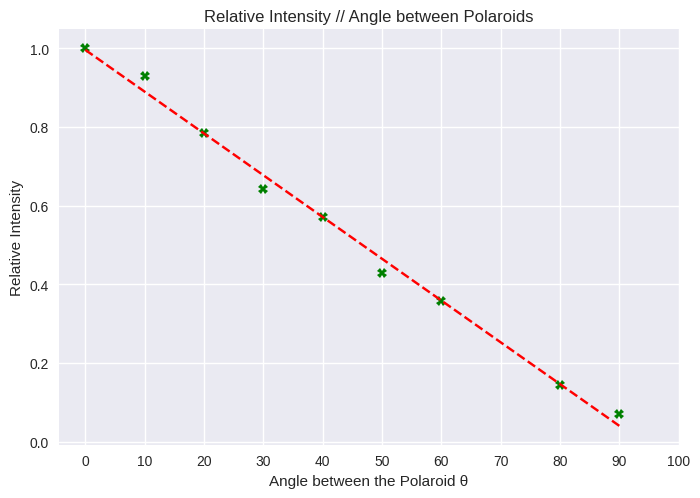

In [29]:
plt.plot(data2.RelativeAngle,data2.P,'gX');
plt.plot(data2.RelativeAngle,m * data2.RelativeAngle + c, 'r--');
plt.xticks(list(range(0,101,10)))
plt.xlabel("Angle between the Polaroid θ");
plt.ylabel("Relative Intensity");
plt.title("Relative Intensity // Angle between Polaroids")
plt.savefig('Figure_3',dpi = 300)

In [30]:
data2

,Angle,RelativeAngle,Current,P,cos^2 θ
1,10,0,14,1.0000,1.000
2,20,10,13,0.9286,0.970
3,30,20,11,0.7857,0.883
4,40,30,9,0.6429,0.750
5,50,40,8,0.5714,0.587
6,60,50,6,0.4286,0.413
7,70,60,5,0.3571,0.250
8,90,80,2,0.1429,0.030
9,100,90,1,0.0714,0.000


In [31]:
data3 = pd.read_csv('dataset_3.csv')
data3["P"] = [(i / max(data3.Current)).__round__(4) for i in data3.Current]
data3["cos^2 θ"] = [((np.cos(x * np.pi/180))**2).__round__(3) for x in data3.Angle]
m, c = np.polyfit(data3.Angle, data3.P, 1)

In [32]:
data3

,Angle,Current,P,cos^2 θ
0,0,50,1.00,1.000
1,10,46,0.92,0.970
2,20,43,0.86,0.883
3,30,42,0.84,0.750
4,40,39,0.78,0.587
5,50,35,0.70,0.413
6,60,32,0.64,0.250
7,70,29,0.58,0.117
8,80,28,0.56,0.030
9,90,27,0.54,0.000


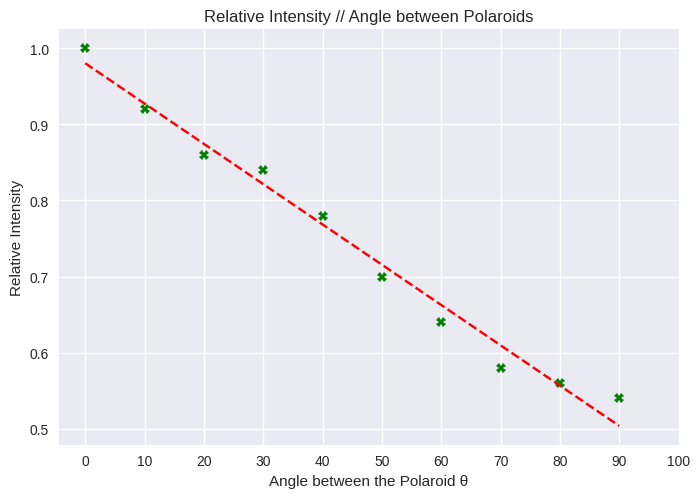

In [33]:
plt.plot(data3.Angle,data3.P,'gX');
plt.plot(data3.Angle,m * data3.Angle + c, 'r--');
plt.xticks(list(range(0,101,10)))
plt.xlabel("Angle between the Polaroid θ");
plt.ylabel("Relative Intensity");
plt.title("Relative Intensity // Angle between Polaroids")

plt.savefig('Figure_4',dpi = 300)